# Model Development
<font size=3><strong>Author:</strong> <a href="https://www.linkedin.com/in/~ashkan/" target="_blank">Ashkan Soltanieh</a><br>
<strong>Date:</strong> Feb. 2, 2022</font>

## Table of Contents

<div class="alert alert-success mt-15">
    <ul>
        <li class="list-unstyled"><a href="#Approach">Approach</a></li>
        <li class="list-unstyled"><a href="#Modeling">Modeling</a></li>
        <li class="list-unstyled"><a href="#Confusion Matrix">Confusion Matrix</a></li>
        <li class="list-unstyled"><a href="#Conclusion">Conclusion</a></li>
    </ul>
</div>

## Approach
As dicussed earlier, the problem we trying to solve here is to predict the area of burn category of primary fires in western Canadian area based on fire characteristics and weather data. Therefore, we need to implement multi-class classification supervised learning approach, and the objective is to find a model that best performs on the test dataset.

In [14]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(),"../src")))
from utils import plot_confusion_matrix

In [2]:
path = os.path.abspath(
        os.path.join(os.getcwd(), "../data/processed/features_label_all.csv"))
df = pd.read_csv(path)
df = df.sample(frac=1, random_state=1)
display(df.shape)
display(df.columns)

(11531, 27)

Index(['t21_mean', 't21_std', 't31_mean', 't31_std', 'frp_mean', 'frp_std',
       'conf_mean', 'conf_std', 'temp_mean', 'temp_std',
       'convective_energy_mean', 'convective_energy_std', 'dewpoint_temp_mean',
       'dewpoint_temp_std', 'total_precipitation_mean',
       'total_precipitation_std', 'total_cloud_cover_mean',
       'total_cloud_cover_std', 'high_veg_cover_mean', 'low_veg_cover_mean',
       'soil_water_mean', 'soil_water_std', 'wind_speed_mean',
       'wind_speed_std', 'satelite_A', 'satelite_T', 'category_aob'],
      dtype='object')

## Modeling

In [3]:
X = df.drop('category_aob', axis = 1)
y = df['category_aob']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

### K-Nearest Neighbor

In [4]:
pipe_knn = Pipeline(steps=[
    ("scaler", StandardScaler()), 
    ("knn", KNeighborsClassifier())
])

params_knn = {
    'knn__n_neighbors':range(5, 40, 5), 
    'knn__algorithm':['auto'], 
    'knn__p':[1, 2]
}

search_knn = RandomizedSearchCV(pipe_knn, params_knn, scoring='accuracy', cv=7, refit=True, n_iter=4)

search_knn.fit(X_train, y_train)
y_hat_knn = search_knn.predict(X_test)

In [5]:
display(search_knn.best_params_)
display(search_knn.best_score_)

{'knn__p': 1, 'knn__n_neighbors': 15, 'knn__algorithm': 'auto'}

0.4075083632759261

### Decision Tree

In [6]:
pipe_tree = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier())
])

params_tree = {
    'tree__criterion':['gini'], 
    'tree__max_depth':range(1,18,1), 
    'tree__min_samples_leaf':range(1,10,1)
}

search_tree = RandomizedSearchCV(pipe_tree, params_tree, scoring='accuracy', cv=7, refit=True)

search_tree.fit(X_train, y_train)
y_hat_tree = search_tree.predict(X_test)

In [7]:
display(search_tree.best_params_)
display(search_tree.best_score_)

{'tree__min_samples_leaf': 2, 'tree__max_depth': 5, 'tree__criterion': 'gini'}

0.3881799033577004

### Logistic Regression

In [8]:
pipe_log = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("log", LogisticRegression())
])

params_log = {
    'log__C':[0.01, 0.1, 1, 10, 100],
    'log__penalty':['l2'],
    'log__solver':['lbfgs', 'sag', 'saga', 'newton-cg'],
    'log__max_iter':[1000]
}

search_log = RandomizedSearchCV(pipe_log, params_log, scoring='accuracy', cv=7, refit=True)

search_log.fit(X_train, y_train)
y_hat_log = search_log.predict(X_test)

In [9]:
display(search_log.best_params_)
display(search_log.best_score_)

{'log__solver': 'saga',
 'log__penalty': 'l2',
 'log__max_iter': 1000,
 'log__C': 100}

0.3990831371577252

### Support Vector Machine

In [10]:
pipe_svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("svm", svm.SVC())
])

params_svm = {
    'svm__C':[0.01, 1, 10, 100],
    'svm__gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'svm__kernel':['linear', 'rbf', 'sigmoid'],
    'svm__decision_function_shape': ['ovo', 'ovr']
}

search_svm = RandomizedSearchCV(pipe_svm, params_svm, scoring='accuracy', cv=7, refit=True, n_iter=5)

search_svm.fit(X_train, y_train)
y_hat_svm = search_svm.predict(X_test)

In [11]:
display(search_svm.best_params_)
display(search_svm.best_score_)

{'svm__kernel': 'linear',
 'svm__gamma': 0.1,
 'svm__decision_function_shape': 'ovo',
 'svm__C': 10}

0.3921447156486185

## Confusion Matrix

In [12]:
labels=[3, 0, 2, 1, 4]
captions = ['Very High', 'High', 'Moderate', 'Low', 'Very Low']

### KNN

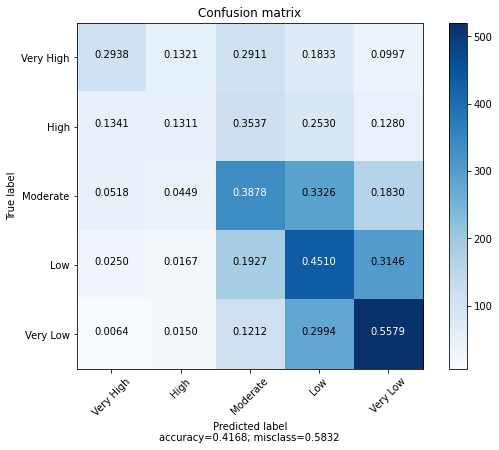

In [15]:
cm_tree = confusion_matrix(y_test, y_hat_knn, labels=labels)
plot_confusion_matrix(cm_tree, captions)

### Decision Tree

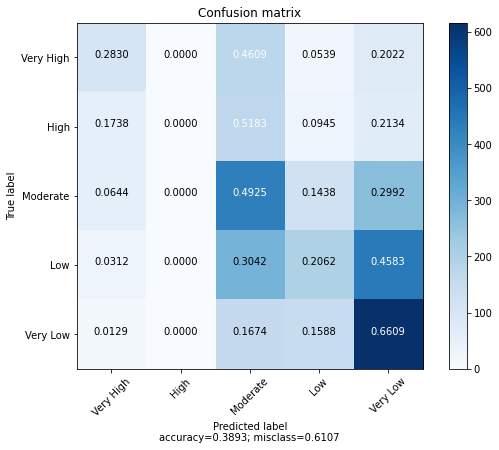

In [16]:
cm_tree = confusion_matrix(y_test, y_hat_tree, labels=labels)
plot_confusion_matrix(cm_tree, captions)

### Logistic Regression

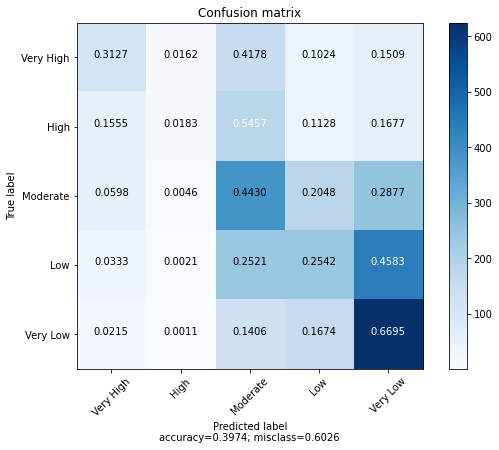

In [17]:
cm_tree = confusion_matrix(y_test, y_hat_log, labels=labels)
plot_confusion_matrix(cm_tree, captions)

### SVM

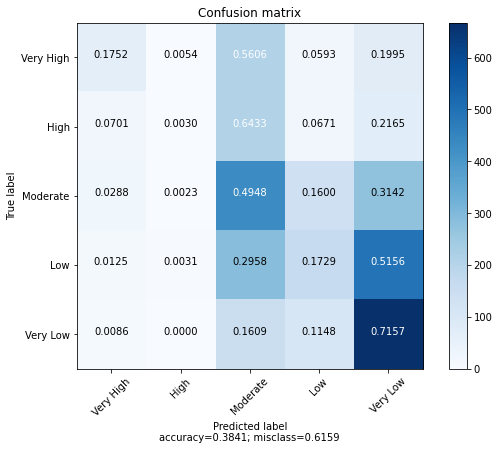

In [19]:
cm_tree = confusion_matrix(y_test, y_hat_svm, labels=labels)
plot_confusion_matrix(cm_tree, captions)

## Conclusion

The best estimation for a label is 72% using SVM algorithm for "Very Low" class. Based on the current generated models,we can conclude that there is a great chance on fires that predicted to be "Moderate" to grow even higher to "High" or "Very High" category. I the other hand, the model is not capable of predicting any High or Very high category fires, and this indicates that more weather elements and fire characteristics data should be collected and grouped for better identification of fires. The overall prdiction accuracy is around 40% which shows the selected features and the way they've been aggregated should be reconsidered, and re-evaluated. 

## <h3 align="center"> Copyright © 2022 - All rights reserved by the author.<h3/>